# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [114]:
boston_houses = pd.read_csv("/Users/rebeccaestiarte/Desktop/IronHack/LABS/Labs_W8/lab-problems-with-ML/data/boston_data.csv")

In [115]:
boston_houses.dtypes #all numeric data, no need to transform

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [116]:
boston_houses.isna().sum() #no missing data

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

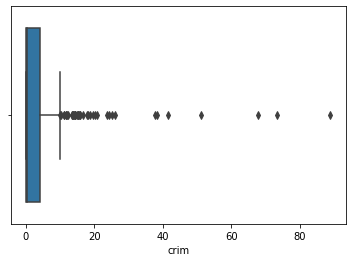

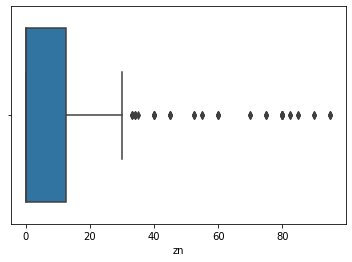

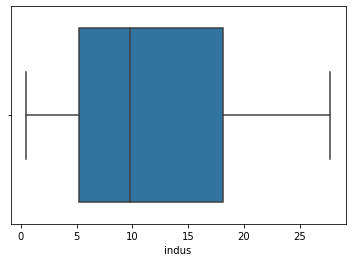

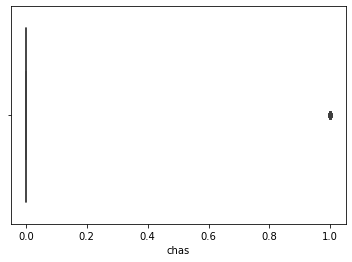

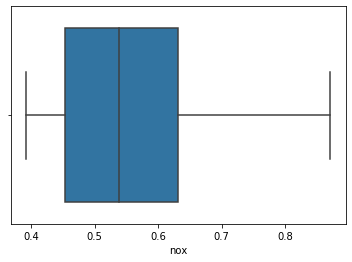

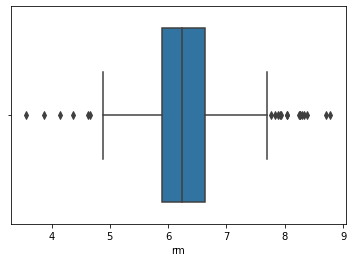

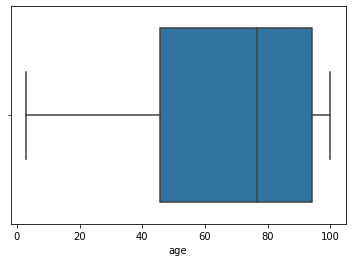

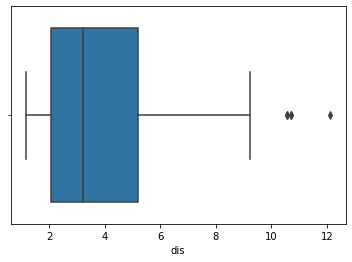

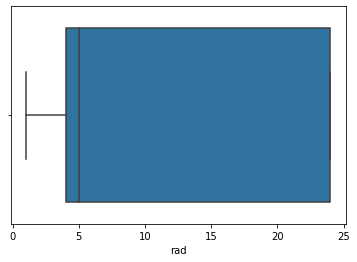

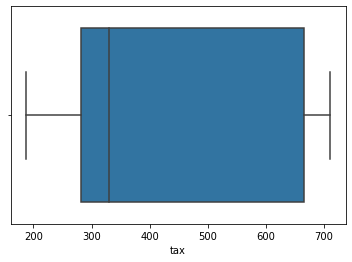

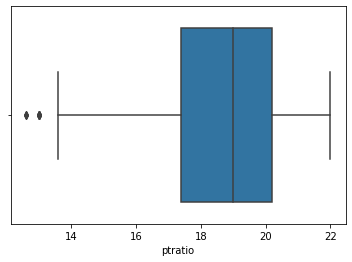

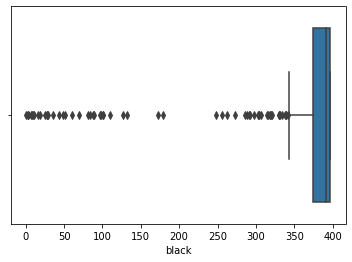

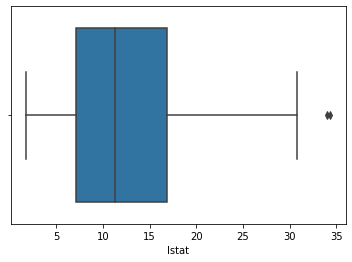

In [117]:
for column in boston_houses.columns[:-1]:
    fig, ax = plt.subplots()
    sns.boxplot(x=column,data=boston_houses)

There are a lot of outliers in columns "crim", "zn", "chas", "black".For now I will keep the outliers as I am not sure what the feature represent. May be useful data for our model.

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

"""
crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s."""

In [118]:
corr = boston_houses.corr()
corr[(corr > 0.5)|(corr < -0.5)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603044,0.565047,NaN,NaN,NaN,NaN
zn,NaN,1.000000,-0.532268,NaN,NaN,NaN,-0.546587,0.659018,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,-0.532268,1.000000,NaN,0.760913,NaN,0.630048,-0.702583,0.616375,0.722828,NaN,NaN,0.608309,-0.501698
chas,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,0.760913,NaN,1.000000,NaN,0.728882,-0.762469,0.612115,0.660607,NaN,NaN,0.587573,NaN
rm,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.578025,0.683541
age,NaN,-0.546587,0.630048,NaN,0.728882,NaN,1.000000,-0.734915,NaN,0.503830,NaN,NaN,0.602001,NaN
dis,NaN,0.659018,-0.702583,NaN,-0.762469,NaN,-0.734915,1.000000,-0.503471,-0.526938,NaN,NaN,-0.500912,NaN
rad,0.603044,NaN,0.616375,NaN,0.612115,NaN,NaN,-0.503471,1.000000,0.917344,NaN,NaN,NaN,NaN
tax,0.565047,NaN,0.722828,NaN,0.660607,NaN,0.503830,-0.526938,0.917344,1.000000,NaN,NaN,0.542732,NaN


In [119]:
"""
I picked the variables with highest correlation with medv:
1. indus: (negative) 
2. rm: (positive)
3. ptratio:(negative)
4. lstat:(negative)

"""

'\nI pick the variables with highest correlation with medv:\n1. indus: (negative) \n2. rm: (positive)\n3. ptratio:(negative)\n4. lstat:(negative)\n\n'

In [120]:
selected_features = boston_houses[["indus", "rm", "ptratio", "lstat", "medv"]]

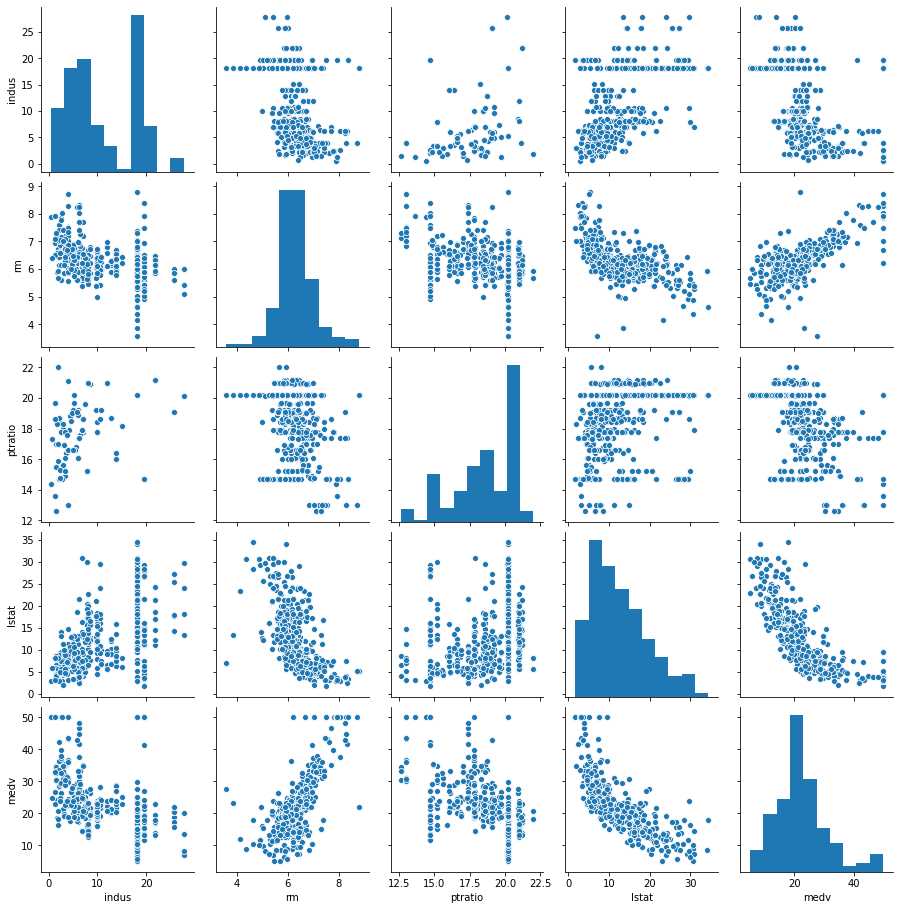

In [121]:
g = sns.pairplot(selected_features)
g

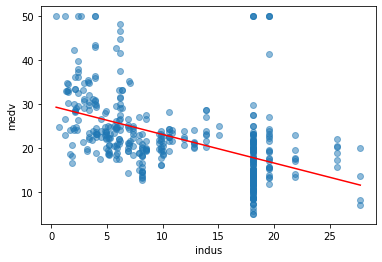

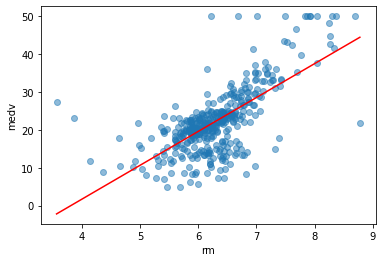

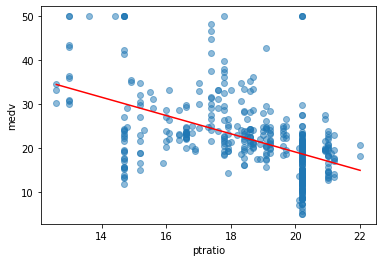

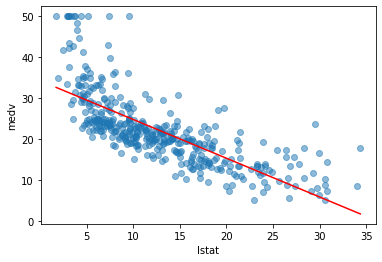

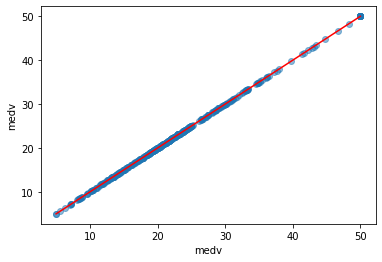

In [122]:
y = selected_features["medv"]
for column in selected_features.columns:
    x = selected_features[column]
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.scatter(x,y, alpha=0.5) 
    plt.xlabel(column)
    plt.ylabel("medv")
    plt.plot(x1,y1,'-r')
    plt.show()
    

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

indus: proportion of non-retail business acres per town.

I expected a positive relation between rm and medv as generally the higher average number of rooms in a house,the
higher its price will be.

ptratio: pupil-teacher ratio by town.

I expected a negative linear relation between lstat adn meds-> the higher the percentage of lower status of the population,
means the area is not very pricey. Therefore, the house price will not be in the highest range



### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

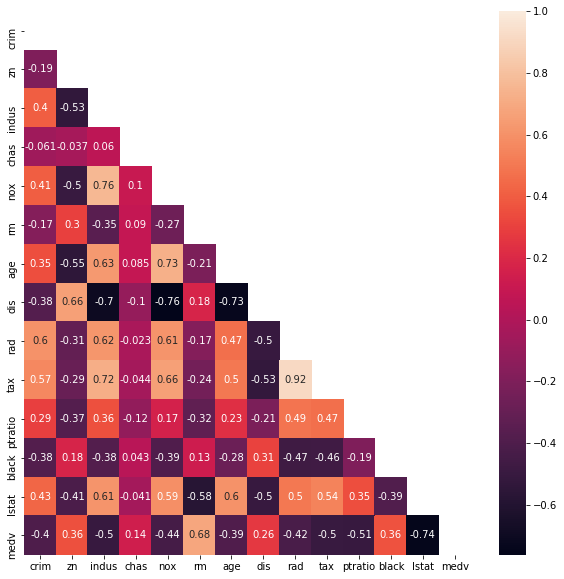

In [123]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr,mask=mask, annot=True)

There is high correlation (taking +-0.7 as reference point) between:

Negative: 
    - dis and indus(-0,7)
    - dus and nox (-0.76)
    - dis and age (-0.73)

Positive:
    - nox and indus(0,76)
    - tax and indus (0,72)
    - age and noz(0.73)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [124]:
boston_houses["medv"].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [125]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    r_score = sklearn.metrics.r2_score(y_true, y_pred)
    return r_score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [126]:
#only on selected features or all???

from sklearn.model_selection import train_test_split

X = boston_houses.iloc[:,:-1].copy()
y = boston_houses["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , shuffle = True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [160]:
# Five separate RFR here with the given max depths

max_depth_par = [2,4,6,8,10]
for parameter in max_depth_par:
    rfr = RandomForestRegressor(max_depth=parameter)
    rfr.fit(X_train, y_train)
    
    y_predict_test = rfr.predict(X_test)
    y_predict_train = rfr.predict(X_train)
    
    scores_test =  r2_score(y_test, y_predict_test)
    scores_train =  r2_score(y_train, y_predict_train)
    
    print("test: max_depth", parameter)
    print (scores_test)
    
    print("train: max_depth", parameter)
    print (scores_train)
    
    print("-------------------------------------")

test: max_depth 2
0.8114281610626046
train: max_depth 2
0.7611651786408979
-------------------------------------
test: max_depth 4
0.8703908316122082
train: max_depth 4
0.906775128062439
-------------------------------------
test: max_depth 6
0.8977954984966985
train: max_depth 6
0.9495584587477578
-------------------------------------
test: max_depth 8
0.8987549895878567
train: max_depth 8
0.9654072634083325
-------------------------------------
test: max_depth 10
0.9010536248626035
train: max_depth 10
0.973616834191737
-------------------------------------


Now, plot the score for each tree on the training set and on the testing set.

What do these results tell you about the effect of the depth of the trees on the performance of the model?

> According to the r2score, the highest the depth, the better the model performs on the training and test set. 
However, the difference of performance on the training set and test set increases with depth too, which that the likelyhood of overfitting also increases.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

> depth = 1: high bias. If we reduce the splits the predictions will become less and less accurate.

> depth = 20: high variance. If we increase the split we will become more precise but we increase the bias at the same time, eventually resulting in overfitting.


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

test: max_depth 2
0.8042391667747544
train: max_depth 2
0.7621689308973842
absolute difference: 0.0017699047467775611
-------------------------------------
test: max_depth 3
0.8560883861311896
train: max_depth 3
0.8607210869585245
absolute difference: 2.1461916955588553e-05
-------------------------------------
test: max_depth 4
0.8795772719079646
train: max_depth 4
0.9064774144992237
absolute difference: 0.0007236176714300696
-------------------------------------
test: max_depth 5
0.8858302793617342
train: max_depth 5
0.9362091544737502
absolute difference: 0.002538031057552105
-------------------------------------
test: max_depth 6
0.9032822330662121
train: max_depth 6
0.9472386514409712
absolute difference: 0.0019321667163368554
-------------------------------------
test: max_depth 7
0.8966001938170369
train: max_depth 7
0.9609086860188462
absolute difference: 0.004135582169270158
-------------------------------------
test: max_depth 8
0.8954696210664077
train: max_depth 8
0.9701613

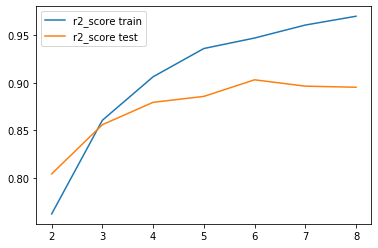

In [173]:
# Produce a plot with the score for the testing and training for the different max depths

max_depth_par = [2,3,4,5,6,7,8]

r2_scores_train = []
r2_scores_test = []
for parameter in max_depth_par:
    rfr = RandomForestRegressor(max_depth=parameter)
    rfr.fit(X_train, y_train)
    
    y_predict_test = rfr.predict(X_test)
    y_predict_train = rfr.predict(X_train)
    
    scores_test =  r2_score(y_test, y_predict_test)
    scores_train =  r2_score(y_train, y_predict_train)
    
    print("test: max_depth", parameter)
    print (scores_test)
    
    print("train: max_depth", parameter)
    print (scores_train)
    
    var = (scores_train-scores_test)**2
    print("absolute difference:", var)
    
    print("-------------------------------------")

    r2_scores_test.append(scores_test)
    r2_scores_train.append(scores_train)
        
plt.plot(max_depth_par, r2_scores_train, label='r2_score train')
plt.plot(max_depth_par, r2_scores_test, label='r2_score test')
plt.legend()
plt.show()

> The best model in this case has a max_depth from 3 to 6. In that case the 
model is high performing and the result on the test data and train data is similar and consistent.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

> The model is not applicable for real-world setting cause the data is outdated and poor.